In [1]:
# Cargar libreriras y modulos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 8]  #por defecto las figuras se displayan 10 pulgadas de ancho y 8 de alto

from sklearn.linear_model import LinearRegression   # para modelos de regresion lineal
from sklearn.linear_model import Ridge   # Ridge regression
from sklearn.linear_model import Lasso   # Lasso regression
from sklearn.linear_model import ElasticNet  # ElasticNet regression
from sklearn.neighbors import KNeighborsRegressor  # Knn regression
from sklearn.tree import DecisionTreeRegressor   # Decision Trees regression
from sklearn.svm import SVR  # Support Vector regression

from sklearn.model_selection import train_test_split  # para partir los datos en conjuntos de entrenamiento y validacion
from sklearn.model_selection import KFold  # para partir la data en k-folds
from sklearn.model_selection import cross_val_score   # para evaluar algoritmos en cross validacion

from sklearn.metrics import mean_squared_error, mean_absolute_error   # para manejar metricas de desempeño
from sklearn.metrics import explained_variance_score  # para hacer reportes de resultados de clasificacion
from sklearn.metrics import r2_score  # para manejar matrices de confusion


In [2]:
import os

print("Carpeta actual:", os.getcwd())
print("Archivo existe?:", os.path.exists("04_EGRESADOS_CAP300.SAV"))

print("Archivos en la carpeta:")
print(os.listdir())

Carpeta actual: c:\Users\a2020\Desktop\app1
Archivo existe?: True
Archivos en la carpeta:
['04_EGRESADOS_CAP300.SAV', 'build', 'datos_vigas.csv', 'dist', 'import pandas as pd.py', 'main.py', 'main.spec', 'Pichula.ipynb', 'ProgramaMejorado2.0.py', 'ProgramaMejorado2.0.spec', 'ProgramaMejorado2.0.zip', 'PRUEBAS', 'Untitled-1.ipynb', 'venv']


In [3]:
import pyreadstat

df, meta = pyreadstat.read_sav(
    "04_EGRESADOS_CAP300.SAV",
    encoding="latin1"  # o cp1252
)
df

,SELECT,CAP300P301,CAP300P302,CAP300P303,CAP300P304,CAP300P305,CAP300P306,CAP300P307,CAP300P308,CAP300P309_1,...,CAP300P340_9,CAP300P340_9_ESPE,CAP300P347,CAP300P348,CAP300P349,CAP300P350,CAP300P351,CAP300P352,CAP300P353,F_EXPANS
0,1.0,2.0,2.0,2.0,NaN,2.0,2.0,NaN,2005.0,1.0,...,NaN,,2.0,2.0,1.0,2.0,1.0,2.0,1.0,14.354539
1,2.0,2.0,2.0,2.0,NaN,2.0,2.0,NaN,2005.0,1.0,...,NaN,,2.0,2.0,1.0,2.0,1.0,12.0,5.0,19.140133
2,3.0,1.0,1.0,2.0,NaN,1.0,2.0,NaN,2006.0,2.0,...,2.0,,2.0,1.0,1.0,1.0,3.0,18.0,1.0,11.251399
3,5.0,2.0,2.0,2.0,NaN,2.0,2.0,NaN,2005.0,1.0,...,NaN,,2.0,2.0,1.0,1.0,2.0,12.0,4.0,16.125803
4,6.0,1.0,1.0,2.0,NaN,1.0,2.0,NaN,2002.0,1.0,...,2.0,,1.0,2.0,1.0,1.0,7.0,21.0,3.0,25.896567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10559,10645.0,2.0,1.0,2.0,NaN,1.0,2.0,NaN,2007.0,1.0,...,2.0,,1.0,3.0,1.0,2.0,1.0,4.0,4.0,44.855395
10560,10646.0,1.0,1.0,2.0,NaN,1.0,2.0,NaN,2008.0,1.0,...,2.0,,3.0,2.0,1.0,1.0,1.0,9.0,2.0,44.855395
10561,10647.0,2.0,1.0,2.0,NaN,1.0,2.0,NaN,2006.0,1.0,...,NaN,,2.0,2.0,1.0,2.0,1.0,11.0,2.0,1.470238
10562,10648.0,1.0,1.0,2.0,NaN,1.0,2.0,NaN,2005.0,2.0,...,2.0,,1.0,2.0,1.0,2.0,1.0,6.0,5.0,1.291667


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ruchikakumbhar/placement-prediction-dataset")

print("Path to dataset files:", path)


c:\Users\a2020\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\a2020\.cache\kagglehub\datasets\ruchikakumbhar\placement-prediction-dataset\versions\1


In [5]:
import os

path = r"C:\Users\a2020\.cache\kagglehub\datasets\ruchikakumbhar\placement-prediction-dataset\versions\1"

print(os.listdir(path))


['placementdata.csv']


In [6]:
import pandas as pd
import os

file = os.path.join(path, 'placementdata.csv')
df = pd.read_csv(file)

print(df.head())
df['HSC_Marks'].unique()


   StudentID  CGPA  Internships  Projects  Workshops/Certifications  \
0          1   7.5            1         1                         1   
1          2   8.9            0         3                         2   
2          3   7.3            1         2                         2   
3          4   7.5            1         1                         2   
4          5   8.3            1         2                         2   

   AptitudeTestScore  SoftSkillsRating ExtracurricularActivities  \
0                 65               4.4                        No   
1                 90               4.0                       Yes   
2                 82               4.8                       Yes   
3                 85               4.4                       Yes   
4                 86               4.5                       Yes   

  PlacementTraining  SSC_Marks  HSC_Marks PlacementStatus  
0                No         61         79       NotPlaced  
1               Yes         78         82   

array([79, 82, 80, 88, 66, 65, 72, 71, 86, 87, 83, 73, 78, 63, 75, 69, 57,
       61, 85, 68, 81, 84, 60, 67, 64, 76, 70, 62, 74, 59, 58, 77])

In [7]:
df

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,9997,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,9998,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,9999,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [8]:
import math
import pandas as pd
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, models, regularizers

In [9]:
df.dtypes

StudentID                      int64
CGPA                         float64
Internships                    int64
Projects                       int64
Workshops/Certifications       int64
AptitudeTestScore              int64
SoftSkillsRating             float64
ExtracurricularActivities     object
PlacementTraining             object
SSC_Marks                      int64
HSC_Marks                      int64
PlacementStatus               object
dtype: object

In [10]:
df = df.drop('StudentID', axis=1)

In [11]:
df1=df.drop(['ExtracurricularActivities','PlacementTraining','PlacementStatus'],axis=1)

In [12]:
names=['CGPA','Internships','Projects','Workshops/Certifications','AptitudeTestScore','SoftSkillsRating','SSC_Marks','HSC_Marks']

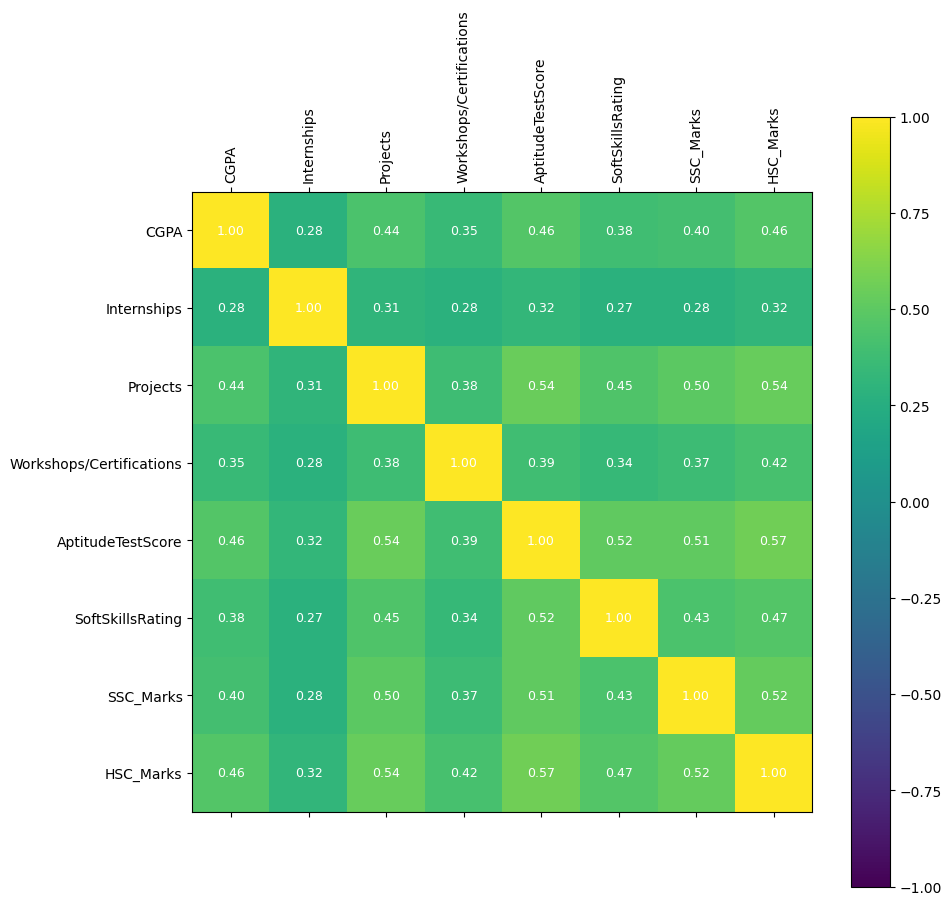

In [13]:
correlations = df1.corr()

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)

ticks = np.arange(len(df1.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)

names = df1.columns
ax.set_xticklabels(names, rotation=90)
ax.set_yticklabels(names)

# ➤ Mostrar los números dentro de cada celda
for i in range(len(correlations)):
    for j in range(len(correlations)):
        valor = correlations.iloc[i, j]
        ax.text(j, i, f"{valor:.2f}", va='center', ha='center', fontsize=9, color='white')
        # Puedes cambiar el color si se pierde con el fondo

plt.show()

In [14]:
# Variables numéricas continuas
numeric_cols = ['Internships','CGPA', 'Projects', 'Workshops/Certifications', 'AptitudeTestScore', 'SoftSkillsRating','SSC_Marks','HSC_Marks']

# Variables categóricas
categoric_cols = ['ExtracurricularActivities','PlacementTraining','PlacementStatus']

# DataFrames separados
numeric_df = df[numeric_cols]
categoric_df = df[categoric_cols]


In [15]:
for col in categoric_cols:
    print(f'Columna {col}')
    print(f'Valores únicos: {categoric_df[col].unique()}\n')

Columna ExtracurricularActivities
Valores únicos: ['No' 'Yes']

Columna PlacementTraining
Valores únicos: ['No' 'Yes']

Columna PlacementStatus
Valores únicos: ['NotPlaced' 'Placed']



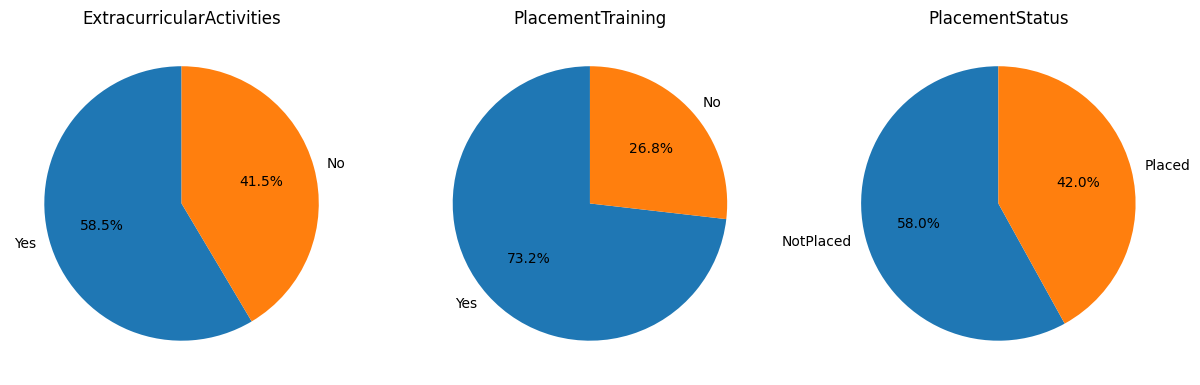

In [16]:
# Preparar el gráfico
cols_per_row = 4
n_cols = len(categoric_cols)
n_rows = math.ceil(n_cols / cols_per_row)
plt.figure(figsize=(cols_per_row * 4, n_rows * 4))

# Mostrar la distribución por clase
for idx, col in enumerate(categoric_cols, 1):
    plt.subplot(n_rows, cols_per_row, idx)

    counts = categoric_df[col].value_counts()

    plt.pie(
        counts.values,
        labels=counts.index,
        autopct="%1.1f%%",
        startangle=90
    )
    plt.title(col)

plt.tight_layout()
plt.show()

In [17]:
df

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed
...,...,...,...,...,...,...,...,...,...,...,...
9995,7.5,1,1,2,72,3.9,Yes,No,85,66,NotPlaced
9996,7.4,0,1,0,90,4.8,No,No,84,67,Placed
9997,8.4,1,3,0,70,4.8,Yes,Yes,79,81,Placed
9998,8.9,0,3,2,87,4.8,Yes,Yes,71,85,Placed


In [18]:
df = pd.get_dummies(
    df,
    columns=categoric_cols,
    drop_first=True
)

In [19]:
df.head(5)

,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks,ExtracurricularActivities_Yes,PlacementTraining_Yes,PlacementStatus_Placed
0,7.5,1,1,1,65,4.4,61,79,False,False,False
1,8.9,0,3,2,90,4.0,78,82,True,True,True
2,7.3,1,2,2,82,4.8,79,80,True,False,False
3,7.5,1,1,2,85,4.4,81,80,True,True,True
4,8.3,1,2,2,86,4.5,74,88,True,True,True


In [20]:
# Renombrar la variable objetivo
df['target'] = df['PlacementStatus_Placed']
df = df.drop('PlacementStatus_Placed', axis=1)


In [21]:
numeric_df.describe()

,Internships,CGPA,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.049200,7.698010,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,0.665901,0.640131,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,0.000000,6.500000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,1.000000,7.400000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,1.000000,7.700000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,1.000000,8.200000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,2.000000,9.100000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


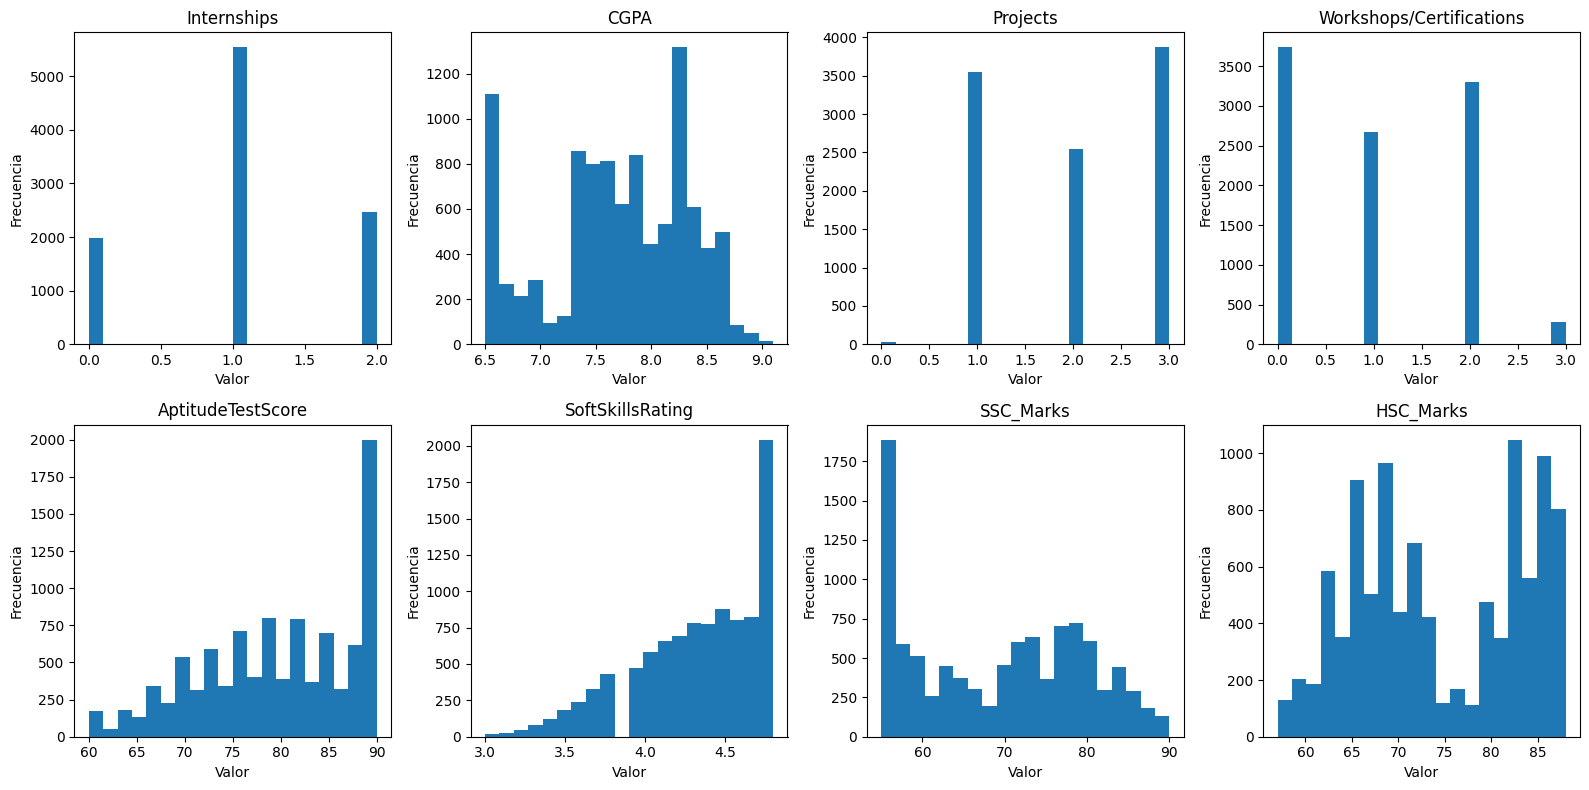

In [22]:
cols_per_row = 4

n_cols = len(numeric_cols)
n_rows = math.ceil(n_cols / cols_per_row)

plt.figure(figsize=(cols_per_row * 4, n_rows * 4))

for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, cols_per_row, idx)

    plt.hist(numeric_df[col].dropna(), bins=20)
    plt.title(col)
    plt.xlabel('Valor')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

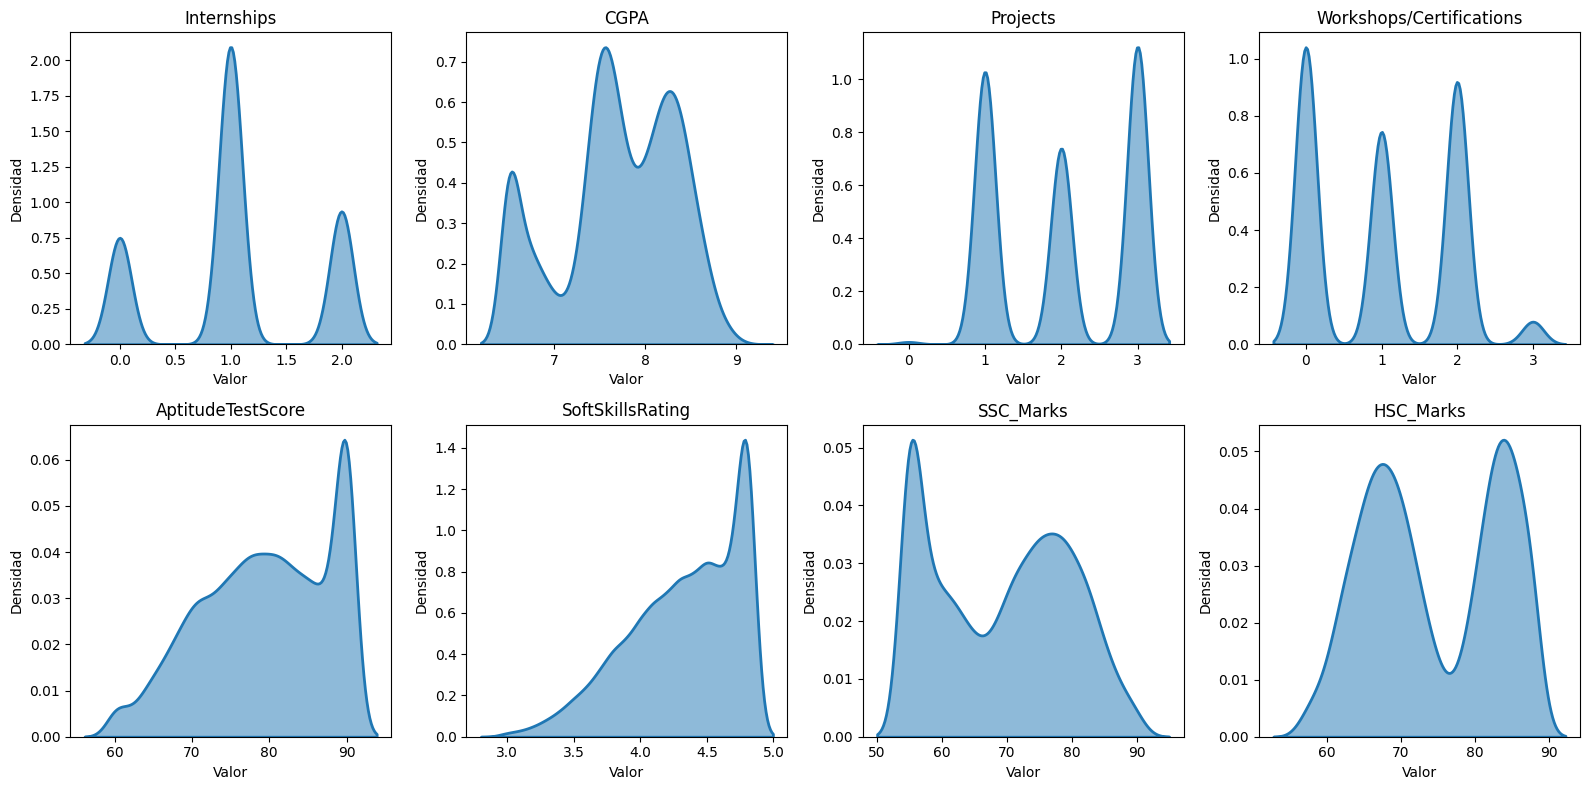

In [23]:
cols_per_row = 4

n_cols = len(numeric_cols)
n_rows = math.ceil(n_cols / cols_per_row)

plt.figure(figsize=(cols_per_row * 4, n_rows * 4))

for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(n_rows, cols_per_row, idx)

    sns.kdeplot(
        data=numeric_df[col].dropna(),
        fill=True,
        alpha=0.5,
        linewidth=2
    )

    plt.title(col)
    plt.xlabel('Valor')
    plt.ylabel('Densidad')

plt.tight_layout()
plt.show()


In [24]:
X = df.drop(columns=['target'])
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [25]:
scaler = StandardScaler()

X_train_std = X_train.copy()
X_test_std = X_test.copy()

X_train_std[numeric_cols] = scaler.fit_transform(X_train_std[numeric_cols])
X_test_std[numeric_cols] = scaler.transform(X_test_std[numeric_cols])

In [26]:
def build_baseline_mlp(input_dim=10):
    model = models.Sequential([
        layers.Input(shape=(input_dim,)),

        # Capa oculta 1
        layers.Dense(16, activation='relu',
                     kernel_regularizer=regularizers.l2(1e-4)),
        layers.Dropout(0.3),

        # Capa oculta 2
        layers.Dense(16, activation='relu',
                     kernel_regularizer=regularizers.l2(1e-4)),

        # Capa de salida
        layers.Dense(1, activation='sigmoid')  # Clasificación binaria
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.AUC(name='auc'),
                 tf.keras.metrics.Precision(name='precision'),
                 tf.keras.metrics.Recall(name='recall')]
    )

    return model

model = build_baseline_mlp()
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 16)             │           176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 465 (1.82 KB)

 Trainable params: 465 (1.82 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
history = model.fit(X_train_std, y_train, validation_data=(X_test_std, y_test), batch_size=16, epochs=300)

Epoch 1/300
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.7462 - auc: 0.8182 - loss: 0.5206 - precision: 0.7123 - recall: 0.6635 - val_accuracy: 0.8010 - val_auc: 0.8717 - val_loss: 0.4539 - val_precision: 0.7509 - val_recall: 0.7867
Epoch 2/300
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7821 - auc: 0.8535 - loss: 0.4730 - precision: 0.7430 - recall: 0.7353 - val_accuracy: 0.7985 - val_auc: 0.8747 - val_loss: 0.4462 - val_precision: 0.7523 - val_recall: 0.7747
Epoch 3/300
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7814 - auc: 0.8553 - loss: 0.4702 - precision: 0.7422 - recall: 0.7341 - val_accuracy: 0.7940 - val_auc: 0.8751 - val_loss: 0.4466 - val_precision: 0.7446 - val_recall: 0.7747
Epoch 4/300
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.7870 - auc: 0.8572 - loss: 0.4672 - precision: 0.7460 - recall: 0.7469 - val_accuracy: 0.7980 - val_auc: 0.8760 - val_loss: 0.4450 - val_precision: 0.7532 - val_recall: 0.7712
Epoch 5/300
500/500 ━━━━━━━━

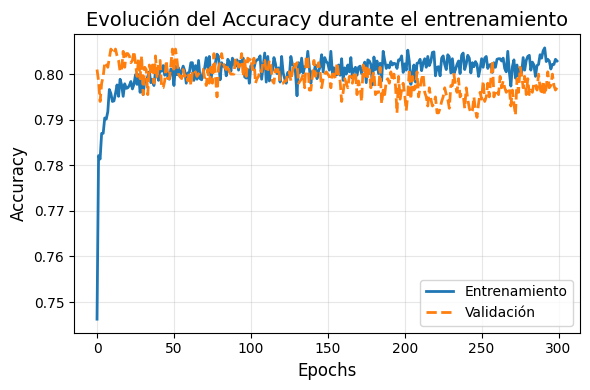

In [28]:
plt.figure(figsize=(6,4))

plt.plot(history.history['accuracy'],
         label='Entrenamiento',
         linewidth=2)

plt.plot(history.history['val_accuracy'],
         label='Validación',
         linewidth=2,
         linestyle='--')

plt.title('Evolución del Accuracy durante el entrenamiento', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

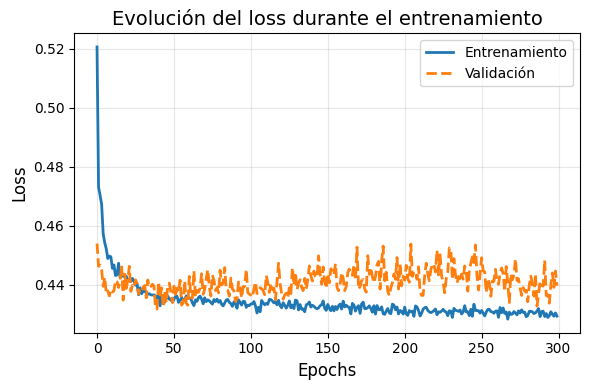

In [29]:
plt.figure(figsize=(6,4))

plt.plot(history.history['loss'],
         label='Entrenamiento',
         linewidth=2)

plt.plot(history.history['val_loss'],
         label='Validación',
         linewidth=2,
         linestyle='--')

plt.title('Evolución del loss durante el entrenamiento', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


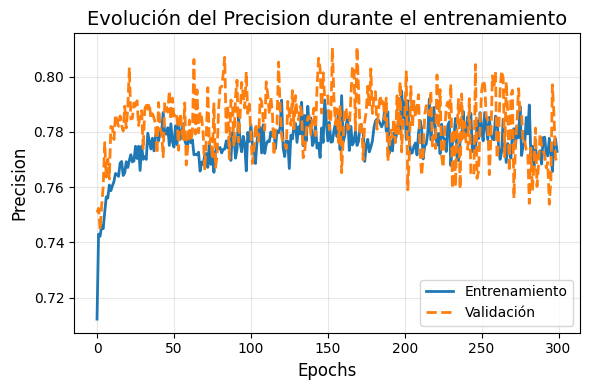

In [30]:
plt.figure(figsize=(6,4))

plt.plot(history.history['precision'],
         label='Entrenamiento',
         linewidth=2)

plt.plot(history.history['val_precision'],
         label='Validación',
         linewidth=2,
         linestyle='--')

plt.title('Evolución del Precision durante el entrenamiento', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Precision', fontsize=12)

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

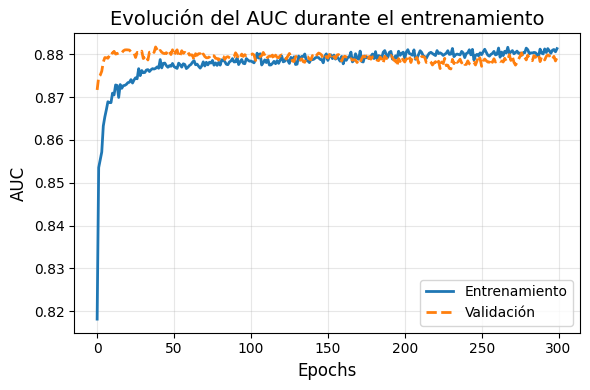

In [31]:
plt.figure(figsize=(6,4))

plt.plot(history.history['auc'],
         label='Entrenamiento',
         linewidth=2)

plt.plot(history.history['val_auc'],
         label='Validación',
         linewidth=2,
         linestyle='--')

plt.title('Evolución del AUC durante el entrenamiento', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('AUC', fontsize=12)

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

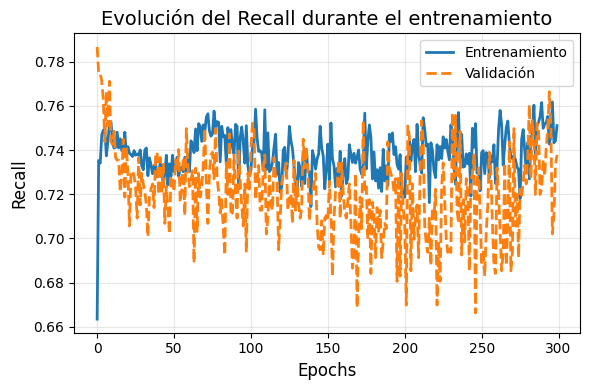

In [32]:
plt.figure(figsize=(6,4))

plt.plot(history.history['recall'],
         label='Entrenamiento',
         linewidth=2)

plt.plot(history.history['val_recall'],
         label='Validación',
         linewidth=2,
         linestyle='--')

plt.title('Evolución del Recall durante el entrenamiento', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Recall', fontsize=12)

plt.legend()
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [33]:
# Evaluar el modelo en el test set
test_metrics = model.evaluate(X_test_std, y_test, verbose=0)

# Mapear los resultados con los nombres de las métricas
metric_names = ['loss', 'accuracy', 'auc', 'precision', 'recall']
print("\n=== MÉTRICAS EN TEST SET ===")
for name, value in zip(metric_names, test_metrics):
    print(f"{name}: {value:.4f}")


=== MÉTRICAS EN TEST SET ===
loss: 0.4396
accuracy: 0.7970
auc: 0.8792
precision: 0.7689
recall: 0.7378


In [34]:
y_pred = model.predict(X_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


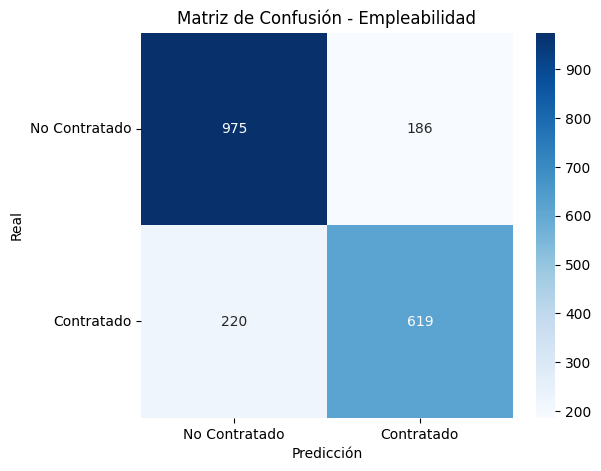

In [35]:
y_pred_prob = model.predict(X_test_std)
y_pred_class = (y_pred_prob >= 0.5).astype(int).flatten()

cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Matriz de Confusión - Empleabilidad")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.xticks([0.5, 1.5], ["No Contratado", "Contratado"])
plt.yticks([0.5, 1.5], ["No Contratado", "Contratado"], rotation=0)

plt.show()